In [ ]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
# from scipy.misc import imread
from imageio.v2 import imread
from keras.src.layers import BatchNormalization
from keras.src.layers import Conv2D, MaxPooling2D
from keras.src.layers import Dense, Dropout, Flatten, Input
from keras.src.models import Sequential
from keras.src.optimizers import Adam

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn tới thư mục của bạn trên Google Drive
folder_path = '/content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'

# Kiểm tra các tệp trong thư mục
import os

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        print(f'Tệp: {filename}')
    elif os.path.isdir(file_path):
        print(f'Thư mục: {filename}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Thư mục: 00038
Thư mục: 00035
Thư mục: 00042
Thư mục: 00041
Thư mục: 00039
Thư mục: 00040
Thư mục: 00037
Thư mục: 00034
Thư mục: 00036
Thư mục: 00033
Thư mục: 00031
Thư mục: 00026
Thư mục: 00025
Thư mục: 00029
Thư mục: 00030
Thư mục: 00028
Thư mục: 00032
Thư mục: 00027
Thư mục: 00024
Thư mục: 00023
Thư mục: 00022
Thư mục: 00018
Thư mục: 00019
Thư mục: 00013
Thư mục: 00020
Thư mục: 00021
Thư mục: 00017
Thư mục: 00016
Thư mục: 00015
Thư mục: 00014
Thư mục: 00004
Thư mục: 00011
Thư mục: 00007
Thư mục: 00008
Thư mục: 00010
Thư mục: 00012
Thư mục: 00005
Thư mục: 00009
Thư mục: 00006
Thư mục: 00003
Thư mục: 00002
Thư mục: 00000
Thư mục: 00001


Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/GT-00000.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00001/GT-00001.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00002/GT-00002.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00003/GT-00003.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')


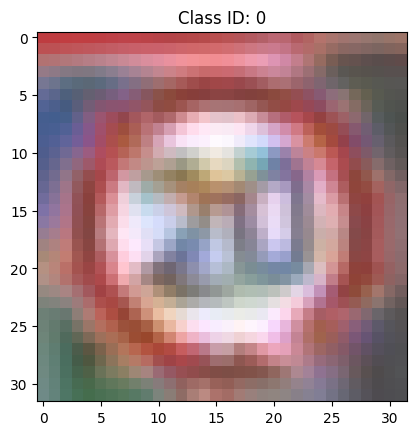

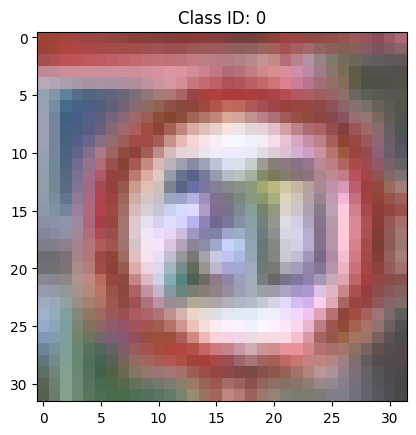

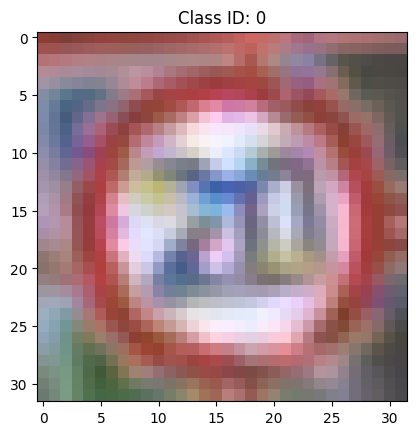

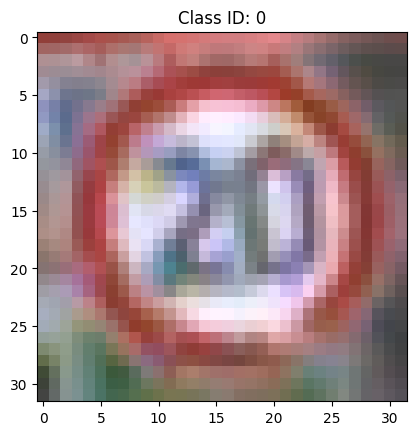

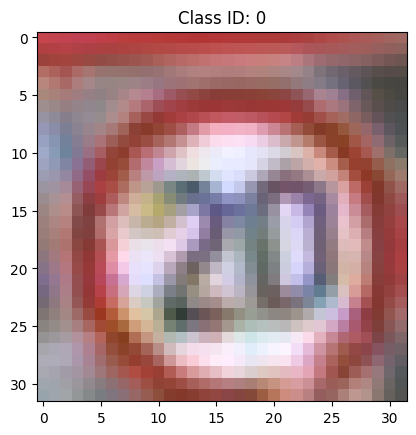

In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu
data_dir = folder_path

# Tạo danh sách các lớp (từ 00000 đến 0003)
classes = [f'{i:05d}' for i in range(4)]

# Khởi tạo danh sách để lưu trữ dữ liệu và nhãn
data = []
labels = []

# Đọc dữ liệu từ các thư mục lớp
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Kiểm tra tên các cột trong DataFrame
    print(f"Columns in {annotation_file}: {annotations.columns}")

    for idx, row in annotations.iterrows():
        img_path = os.path.join(class_dir, row['Filename'])
        img = Image.open(img_path)

        # Crop image based on the Region of Interest (ROI)
        roi = img.crop((row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']))

        # Resize image to a consistent size, e.g., 32x32 pixels
        roi = roi.resize((32, 32))

        # Convert image to numpy array
        img_array = np.array(roi)

        data.append(img_array)
        labels.append(row['ClassId'])

# Chuyển đổi danh sách thành numpy array
data = np.array(data)
labels = np.array(labels)

# Hiển thị một vài hình ảnh và nhãn tương ứng
for i in range (5):
    plt.imshow(data[i])
    plt.title(f'Class ID: {labels[i]}')
    plt.show()

Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/GT-00000.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00001/GT-00001.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00002/GT-00002.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00003/GT-00003.csv: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')
Columns in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/I

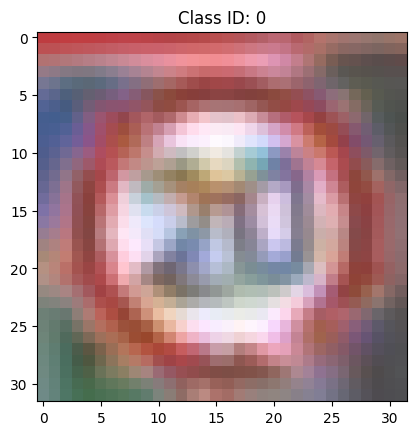

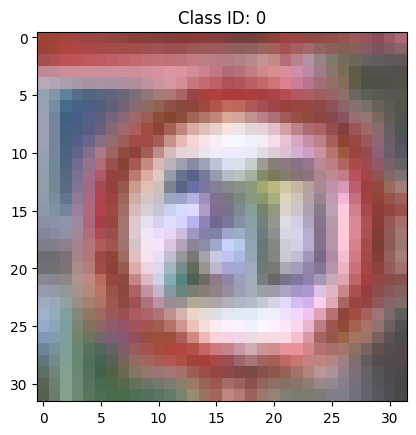

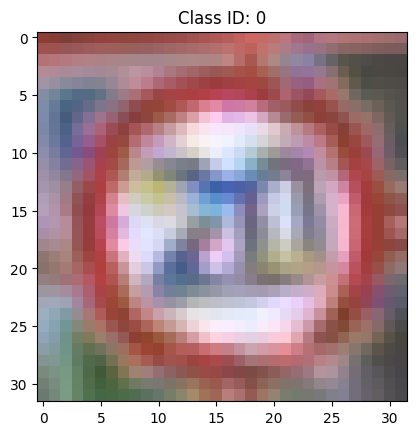

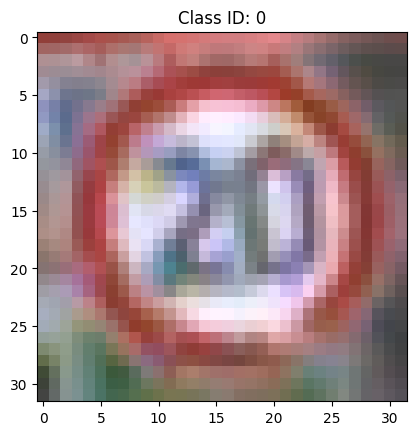

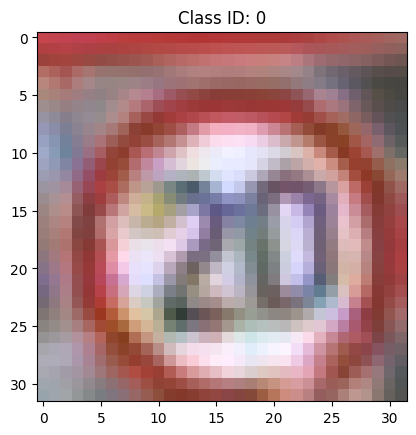

In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu
data_dir = folder_path

# Tạo danh sách các lớp (từ 00000 đến 00042)
classes = [f'{i:05d}' for i in range(43)]

# Khởi tạo danh sách để lưu trữ dữ liệu và nhãn
data = []
labels = []

# Đọc dữ liệu từ các thư mục lớp
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Kiểm tra tên các cột trong DataFrame
    print(f"Columns in {annotation_file}: {annotations.columns}")

    for idx, row in annotations.iterrows():
        img_path = os.path.join(class_dir, row['Filename'])
        img = Image.open(img_path)

        # Crop image based on the Region of Interest (ROI)
        roi = img.crop((row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']))

        # Resize image to a consistent size, e.g., 32x32 pixels
        roi = roi.resize((32, 32))

        # Convert image to numpy array
        img_array = np.array(roi)

        data.append(img_array)
        labels.append(row['ClassId'])

# Chuyển đổi danh sách thành numpy array
data = np.array(data)
labels = np.array(labels)

# Hiển thị một vài hình ảnh và nhãn tương ứng
for i in range (5):
    plt.imshow(data[i])
    plt.title(f'Class ID: {labels[i]}')
    plt.show()

In [ ]:
# lưu cả hai vào một tệp .npz
np.savez('/content/drive/MyDrive/GTSRB_dataset.npz', data=data, labels=labels)


Mounted at /content/drive
(39209, 32, 32, 3)
(39209,)


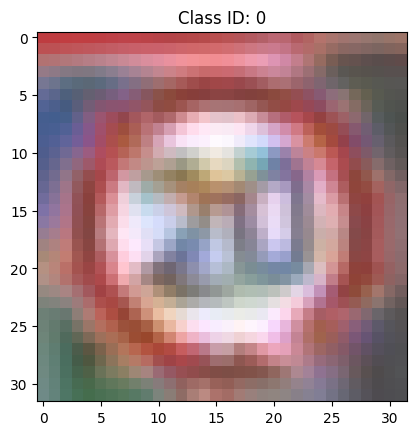

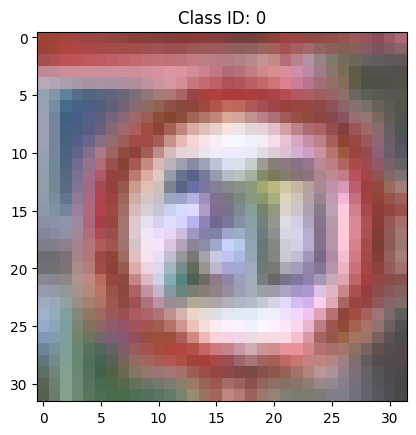

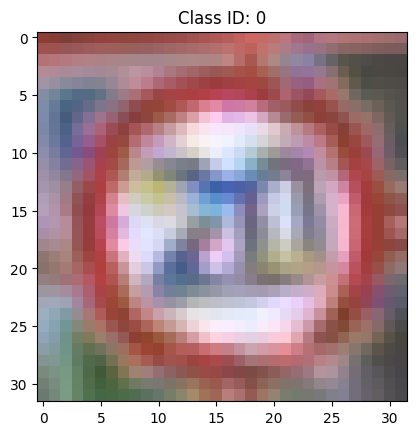

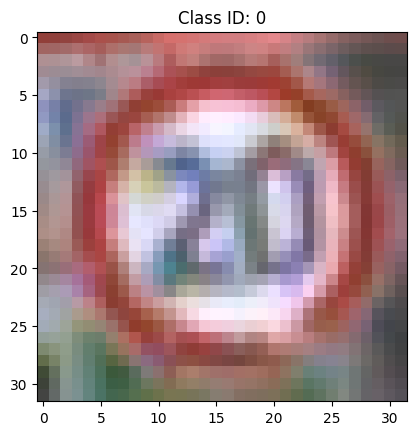

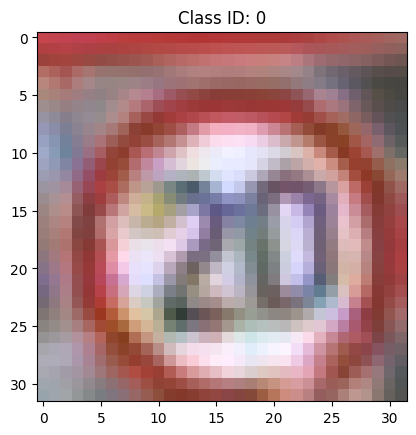

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Doc data từ tệp .npz
dataset = np.load('/content/drive/MyDrive/GTSRB_dataset.npz')
data = dataset['data']
labels = dataset['labels']

print(data.shape)  # Kiểm tra hình dạng của dữ liệu
print(labels.shape)

# Hiển thị một vài hình ảnh để kiểm tra
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(data[i])
    plt.title(f'Class ID: {labels[i]}')
    plt.show()


In [ ]:
# In ra thông tin chi tiết về dữ liệu
print("Thông tin về dữ liệu:")
print(f'- Số lượng mẫu: {data.shape[0]}')
print(f'- Hình dạng của từng ảnh: {data.shape[1:]}')
print(f'- Kiểu dữ liệu của ảnh: {data.dtype}')
print(f'- Kiểu dữ liệu của nhãn: {labels.dtype}')
print(f'- Số lượng lớp: {len(np.unique(labels))}')
print(f'- Các lớp: {np.unique(labels)}')

Thông tin về dữ liệu:
- Số lượng mẫu: 39209
- Hình dạng của từng ảnh: (32, 32, 3)
- Kiểu dữ liệu của ảnh: uint8
- Kiểu dữ liệu của nhãn: int64
- Số lượng lớp: 43
- Các lớp: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
# Thống kê cơ bản về dữ liệu ảnh
print("\nThống kê cơ bản về dữ liệu ảnh:")
print(f'- Giá trị nhỏ nhất trong dữ liệu ảnh: {np.min(data)}')
print(f'- Giá trị lớn nhất trong dữ liệu ảnh: {np.max(data)}')
print(f'- Giá trị trung bình của dữ liệu ảnh: {np.mean(data)}')
print(f'- Độ lệch chuẩn của dữ liệu ảnh: {np.std(data)}')


Thống kê cơ bản về dữ liệu ảnh:
- Giá trị nhỏ nhất trong dữ liệu ảnh: 0
- Giá trị lớn nhất trong dữ liệu ảnh: 255
- Giá trị trung bình của dữ liệu ảnh: 85.9728660216059
- Độ lệch chuẩn của dữ liệu ảnh: 68.11477530040924


In [ ]:
# Thống kê cơ bản về nhãn
print("\nThống kê cơ bản về nhãn:")
(unique, counts) = np.unique(labels, return_counts=True)
print(f'- Phân bố các lớp:\n{dict(zip(unique, counts))}')


Thống kê cơ bản về nhãn:
- Phân bố các lớp:
{0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}


In [ ]:
# Kiểm tra dữ liệu rỗng trong từng cột của mỗi lớp
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Kiểm tra giá trị rỗng
    missing_values = annotations.isnull().sum()
    print(f"Missing values in {annotation_file}:")
    print(missing_values)


Missing values in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/GT-00000.csv:
Filename    0
Width       0
Height      0
Roi.X1      0
Roi.Y1      0
Roi.X2      0
Roi.Y2      0
ClassId     0
dtype: int64
Missing values in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00001/GT-00001.csv:
Filename    0
Width       0
Height      0
Roi.X1      0
Roi.Y1      0
Roi.X2      0
Roi.Y2      0
ClassId     0
dtype: int64
Missing values in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00002/GT-00002.csv:
Filename    0
Width       0
Height      0
Roi.X1      0
Roi.Y1      0
Roi.X2      0
Roi.Y2      0
ClassId     0
dtype: int64
Missing values in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00003/GT-00003.csv:
Filename    0
Width       0
Height      0
Roi.X1      0
Roi.Y1      0
Roi.X2      0
Roi.Y2      0
ClassId     0
dtype: int64
Missing values in /content/drive

In [ ]:
# Loại bỏ các hàng có giá trị rỗng
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Loại bỏ các hàng có giá trị rỗng
    annotations_cleaned = annotations.dropna()

    # Ghi lại tệp CSV đã làm sạch (Optional)
    annotations_cleaned.to_csv(annotation_file, index=False, sep=';')


In [ ]:
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Kiểm tra giá trị ROI hợp lệ
    invalid_roi = annotations[(annotations['Roi.X1'] >= annotations['Roi.X2']) |
                              (annotations['Roi.Y1'] >= annotations['Roi.Y2'])]
    print(f"Invalid ROI in {annotation_file}:")
    print(invalid_roi)

    # Loại bỏ các hàng có ROI không hợp lệ
    annotations_cleaned = annotations.drop(invalid_roi.index)

    # Ghi lại tệp CSV đã làm sạch (Optional)
    annotations_cleaned.to_csv(annotation_file, index=False, sep=';')


Invalid ROI in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/GT-00000.csv:
Empty DataFrame
Columns: [Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId]
Index: []
Invalid ROI in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00001/GT-00001.csv:
Empty DataFrame
Columns: [Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId]
Index: []
Invalid ROI in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00002/GT-00002.csv:
Empty DataFrame
Columns: [Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId]
Index: []
Invalid ROI in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00003/GT-00003.csv:
Empty DataFrame
Columns: [Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId]
Index: []
Invalid ROI in /content/drive/MyDrive/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00004/GT-00004.csv:
Empty DataFrame
Column

In [ ]:
# Loại bỏ các hàng có dữ liệu nhiễu
for class_id in classes:
    class_dir = os.path.join(data_dir, class_id)
    annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')

    # Đọc tệp CSV chú thích
    annotations = pd.read_csv(annotation_file, delimiter=';')

    # Loại bỏ các hàng có dữ liệu nhiễu
    annotations_cleaned = annotations[~annotations.index.isin(invalid_roi.index)]

    # Ghi lại tệp CSV đã làm sạch (Optional)
    annotations_cleaned.to_csv(annotation_file, index=False, sep=';')


In [ ]:
# Chuẩn hóa hình ảnh (chuyển các giá trị pixel từ 0-255 về 0-1)
# Chuẩn hóa hình ảnh (chuyển các giá trị pixel từ 0-255 về 0-1)
data = np.array(data)  # Đảm bảo rằng data là một numpy array
data = data / 255.0

# Mã hóa nhãn thành các giá trị số
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


<ipython-input-19-d59bf5a91bc2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels_encoded, palette='viridis')


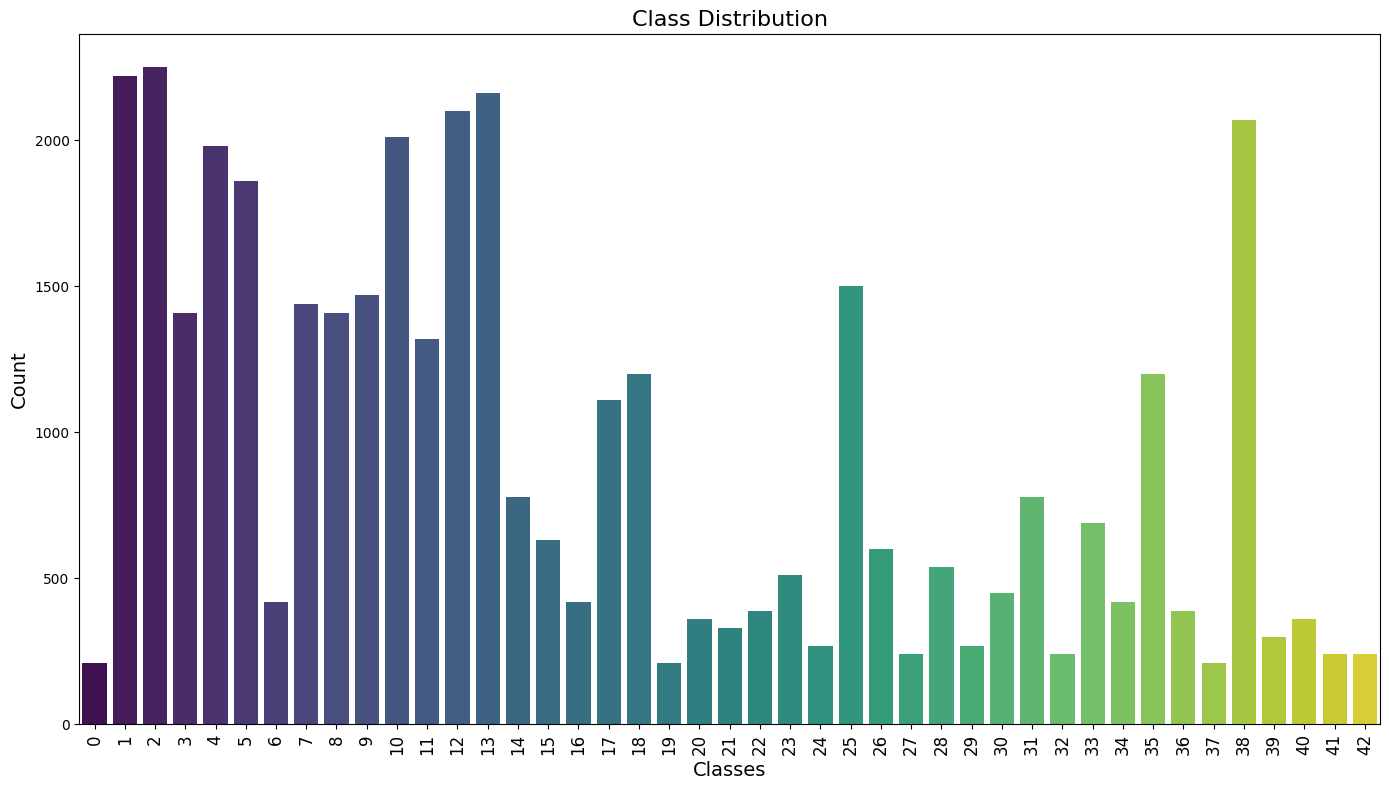

In [ ]:
import seaborn as sns

# Điều chỉnh kích thước của biểu đồ để phù hợp với số lượng lớp
plt.figure(figsize=(14, 8))  # Điều chỉnh kích thước biểu đồ

# Vẽ biểu đồ phân phối lớp
sns.countplot(x=labels_encoded, palette='viridis')

# Thiết lập tiêu đề và các thuộc tính khác của biểu đồ
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Xoay nhãn x-axis nếu cần thiết để tránh chồng chéo
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()  # Đảm bảo rằng các phần của biểu đồ không bị cắt
plt.show()

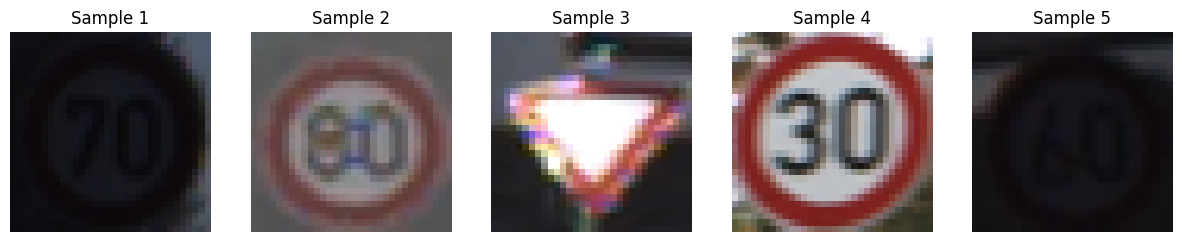

In [ ]:
# Chọn một số ảnh ngẫu nhiên từ dữ liệu
num_samples = 5
random_indices = np.random.choice(len(data), num_samples, replace=False)
sample_images = [data[i] for i in random_indices]

# Hiển thị các ảnh mẫu
plt.figure(figsize=(15, 10))
for i, img in enumerate(sample_images):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Sample {i + 1}')
plt.show()

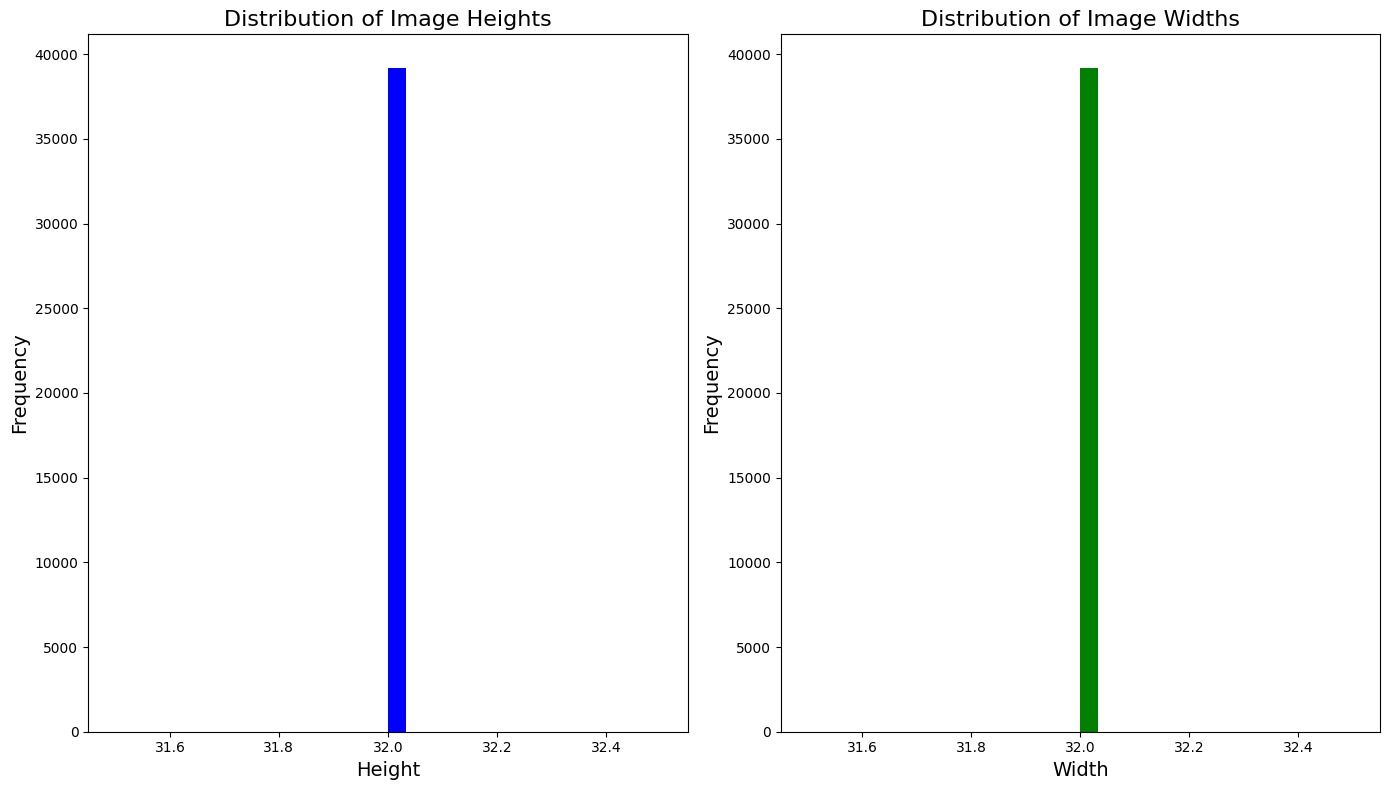

In [ ]:
# Biểu đồ phân phối kích thước ảnh
image_shapes = [img.shape for img in data]
height, width, _ = zip(*image_shapes)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.hist(height, bins=30, color='blue')
plt.title('Distribution of Image Heights', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(width, bins=30, color='green')
plt.title('Distribution of Image Widths', fontsize=16)
plt.xlabel('Width', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


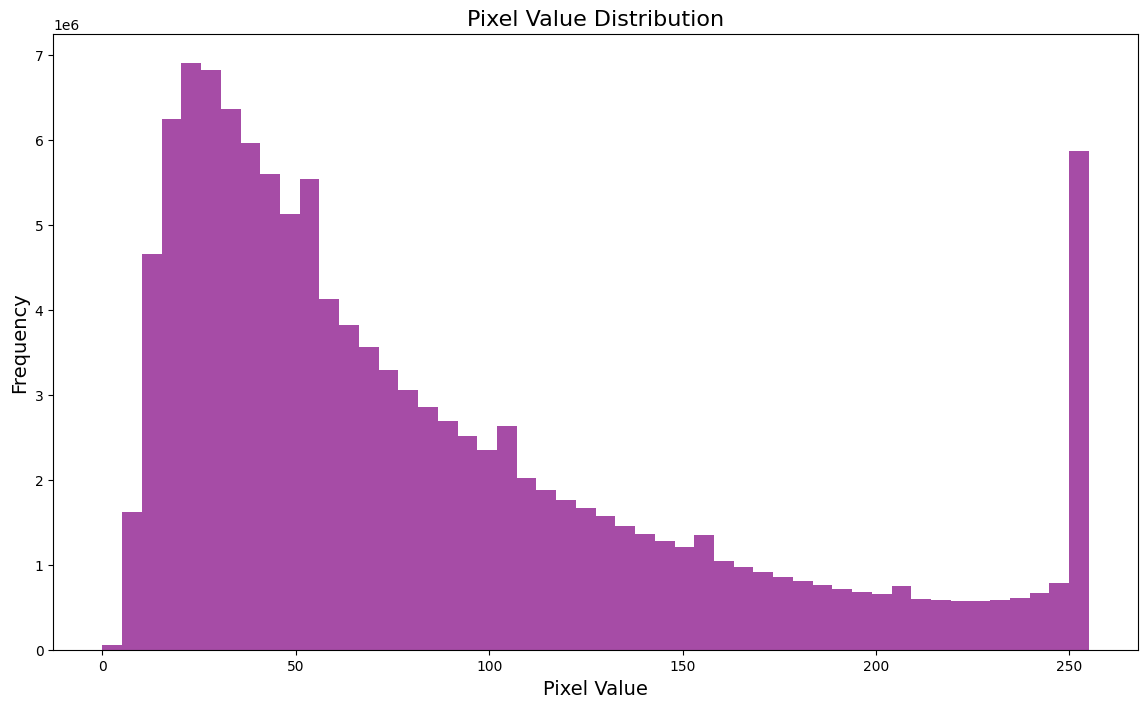

In [ ]:
# Biểu đồ phân phối giá trị pixel
pixels = []
for img in data:
    pixels.extend(img.flatten())

plt.figure(figsize=(14, 8))
plt.hist(pixels, bins=50, color='purple', alpha=0.7)
plt.title('Pixel Value Distribution', fontsize=16)
plt.xlabel('Pixel Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


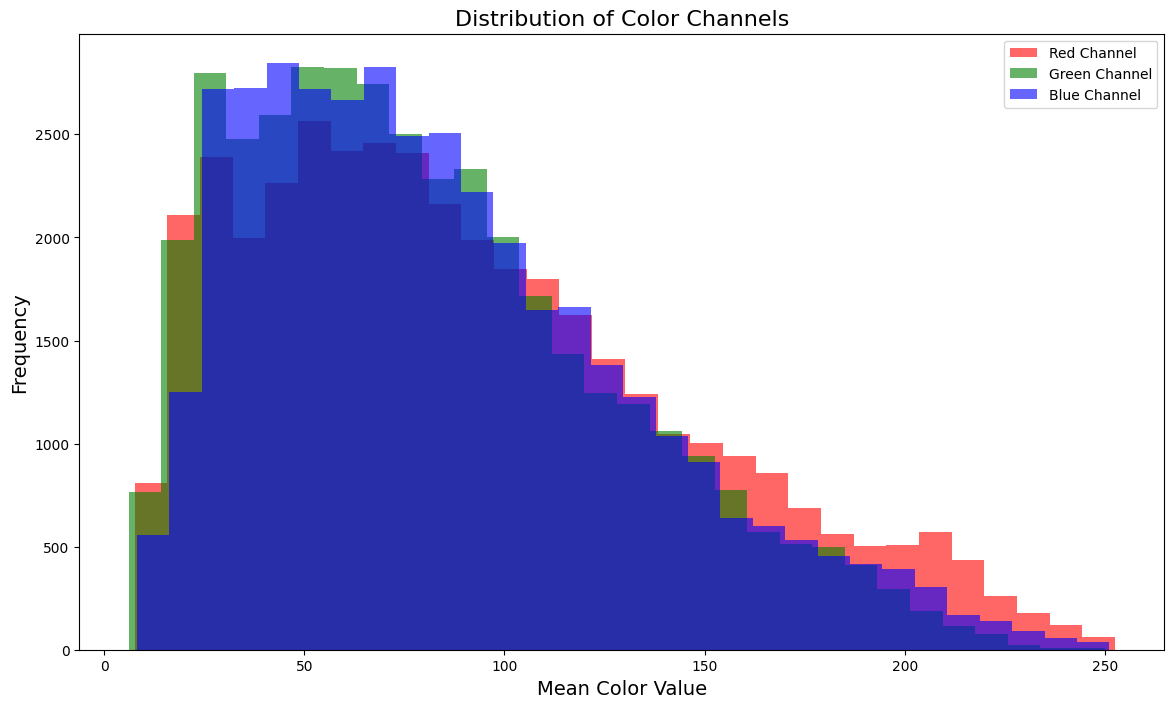

In [ ]:
# Biểu đồ phân phối màu sắc
reds = []
greens = []
blues = []

for img in data:
    reds.append(np.mean(img[:, :, 0]))
    greens.append(np.mean(img[:, :, 1]))
    blues.append(np.mean(img[:, :, 2]))

plt.figure(figsize=(14, 8))
plt.hist(reds, bins=30, color='red', alpha=0.6, label='Red Channel')
plt.hist(greens, bins=30, color='green', alpha=0.6, label='Green Channel')
plt.hist(blues, bins=30, color='blue', alpha=0.6, label='Blue Channel')
plt.title('Distribution of Color Channels', fontsize=16)
plt.xlabel('Mean Color Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()
